In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import seaborn as sn

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the data processed in matlab
dataset = pd.read_csv(r'C:\Users\Buia Sorin\Desktop\Projects\Phonocardiogram-classification\Feature_Table.csv')
dataset.head()

,ZCR,MeanValue,MedianValue,HighestValue,MeanFreq,Rms,Bandpower,Median,StandardDeviation,MeanAbsoluteDeviation,...,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,class
0,0.071717,-0.000142,0.000154,0.832178,0.116381,0.101047,0.010210,0.000154,0.101072,0.062422,...,-4.428484,-3.319025,-0.893888,2.775031,-1.175828,1.208410,-2.359630,-1.972719,1.533714,Abnormal
1,0.101051,-0.000525,0.001633,0.630010,0.111491,0.085846,0.007370,0.001633,0.085866,0.050823,...,-1.693060,-2.873727,-1.480862,-0.210530,0.605193,4.019042,0.427442,-2.337687,-3.059609,Abnormal
2,0.093845,0.000517,0.004942,0.583041,0.119286,0.093942,0.008825,0.004942,0.093964,0.061505,...,-5.298612,-3.115297,-0.194838,3.316998,2.189729,-0.496834,1.046333,1.595074,-2.924847,Abnormal
3,0.088487,-0.001553,0.002760,0.696764,0.121763,0.091762,0.008420,0.002760,0.091771,0.061818,...,-1.195054,-2.324530,-1.727096,-1.192520,-0.081264,3.394007,0.668527,0.412441,-3.420079,Abnormal
4,0.099602,0.001200,-0.000247,0.813632,0.108327,0.099765,0.009953,-0.000247,0.099783,0.056703,...,-1.519496,-4.116344,-2.914708,3.211512,2.686922,2.716340,-0.487440,-1.115228,-2.220554,Abnormal


In [3]:
dataset.shape

(79720, 34)

In [16]:
dataset.isnull().any()

ZCR                      False
MeanValue                False
MedianValue              False
HighestValue             False
MeanFreq                 False
Rms                      False
Bandpower                False
Median                   False
StandardDeviation        False
MeanAbsoluteDeviation    False
Quantile25               False
Quantile75               False
IQR                      False
Skewness                 False
Kurtosis                 False
signalEntropy            False
SpectralEntropy          False
FFTfreqmax               False
FFTvalmax                False
FFTRatio                 False
MFCC1                    False
MFCC2                    False
MFCC3                    False
MFCC4                    False
MFCC5                    False
MFCC6                    False
MFCC7                    False
MFCC8                    False
MFCC9                    False
MFCC10                   False
MFCC11                   False
MFCC12                   False
MFCC13  

In [4]:
# Split the data in training and testing
X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(63776, 33)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,15)
for md in max_dep:
    tree= RandomForestClassifier(n_estimators=100,max_depth=md,random_state=7)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

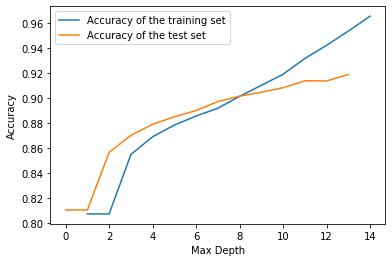

In [22]:
plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
plt.plot(test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.savefig('accuracy.png')

In [23]:
training_accuracy.append(tree.score(X_train, y_train))
test_accuracy.append(tree.score(X_test, y_test))

print('acc for training data: {:.3f}'.format(tree.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(tree.score(X_test,y_test)))

acc for training data: 0.965
acc for test data: 0.919


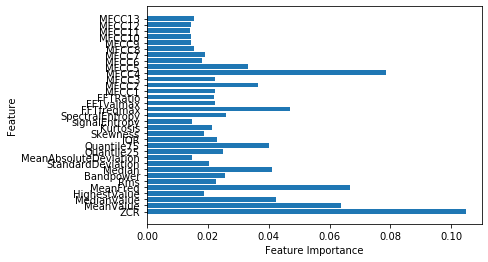

<Figure size 432x288 with 0 Axes>

In [17]:
n_feature = X.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
figsize=(9, 9)
feature_names = dataset.loc["ZCR":"MFCC13",:]
plt.yticks(np.arange(n_feature), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
plt.savefig('Features_relevance.png')

In [18]:
plt.savefig('Features_relevance.png')

<Figure size 432x288 with 0 Axes>

In [20]:
# Prediction and performance
rfc_predict = tree.predict(X_test)
print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

Classification Report
              precision    recall  f1-score   support

    Abnormal       0.84      0.78      0.81      3022
      Normal       0.95      0.96      0.96     12922

    accuracy                           0.93     15944
   macro avg       0.89      0.87      0.88     15944
weighted avg       0.93      0.93      0.93     15944





In [ ]:
# Saving the model
# Model = 'rfc.sav'
# pickle.dump(rfc, open(Model, 'wb'))

# Loading the model
# Saved_Model = pickle.load(open(Model, 'rb'))
# Saved_Model.predict(X_test) 
# print(classification_report(y_test, Saved_Model))

In [23]:
# Hyper-parameter optimization

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 55.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [25]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [26]:
# Prediction and performance
rf_random = rf_random.predict(X_test)
print("Classification Report")
print(classification_report(y_test, rf_random))
print('\n')

Classification Report
              precision    recall  f1-score   support

    Abnormal       0.85      0.79      0.82      3022
      Normal       0.95      0.97      0.96     12922

    accuracy                           0.93     15944
   macro avg       0.90      0.88      0.89     15944
weighted avg       0.93      0.93      0.93     15944





In [40]:
accuracy_score(y_test,rf_random)

0.9333918715504265